In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#1. import Data

In [ ]:
df = pd.read_json('/content/Netflix Subscription Fees.json')
df

,Country_code,Subscription ID,Cost Per Month - Basic ($),Subscription ID__1,Cost Per Month - Standard ($),Subscription ID__2,Cost Per Month - Premium ($),Total Library Size,No. of TV Shows,No. of Movies
0,ar,0,3.74,1,6.3,2,9.26,4760,3154,1606
1,au,0,7.84,1,12.12,2,16.39,6114,4050,2064
2,at,0,9.03,1,14.67,2,20.32,5640,3779,1861
3,be,0,10.16,1,15.24,2,20.32,4990,3374,1616
4,bo,0,7.99,1,10.99,2,13.99,4991,3155,1836
...,...,...,...,...,...,...,...,...,...,...
190,ua,0,,1,,2,,5336,3261,2075
191,gb,0,,1,,2,,6643,4551,2092
192,us,0,,1,,2,,5818,3826,1992
193,uy,0,,1,,2,,4989,3154,1835


#2. check missing values

In [ ]:
# Count NaN values in each column
nan_count = df.isnull().sum()
print("NaN Count in Each Column:")
nan_count

NaN Count in Each Column:


,0
Country_code,0
Subscription ID,0
Cost Per Month - Basic ($),0
Subscription ID__1,0
Cost Per Month - Standard ($),0
Subscription ID__2,0
Cost Per Month - Premium ($),0
Total Library Size,0
No. of TV Shows,0
No. of Movies,0


In [ ]:
for column in df.columns:
  unique_values = df[column].unique()
  print(f"Column '{column}': {unique_values} \n")

Column 'Country_code': ['ar' 'au' 'at' 'be' 'bo' 'br' 'bg' 'ca' 'cl' 'co' 'cr' 'hr' 'cz' 'dk'
 'ec' 'ee' 'fi' 'fr' 'de' 'gi' 'gr' 'gt' 'hn' 'hk' 'hu' 'is' 'in' 'id'
 'ie' 'il' 'it' 'jp' 'lv' 'li' 'lt' 'my' 'mx' 'md' 'mc' 'nl' 'nz' 'no'
 'py' 'pe' 'ph' 'pl' 'pt' 'ro' 'ru' 'sm' 'sg' 'sk' 'za' 'kr' 'es' 'se'
 'ch' 'tw' 'th' 'tr' 'ua' 'gb' 'us' 'uy' 've'] 

Column 'Subscription ID': [0] 

Column 'Cost Per Month - Basic ($)': [3.74 7.84 9.03 10.16 7.99 4.61 7.91 7.07 4.31 8.99 8.83 12 8.08 7.64 2.64
 8.36 10.56 8.73 12.88 8.29 6.62 8.8 9.94 6.11 7.35 7.13 8.13 9.51 6.26
 8.07 10.9 9.74 8.34 1.97 5.64 ''] 

Column 'Subscription ID__1': [1] 

Column 'Cost Per Month - Standard ($)': [6.3 12.12 14.67 15.24 10.99 7.11 11.29 11.87 9.91 6.86 12.99 11.49 15.04
 13.54 12.42 10 10.71 6.61 10.66 15.05 13.13 20.46 10.65 10.43 12.53 12.17
 8.56 9.14 10.58 10.84 12.81 10.05 11.47 14.2 11.9 3 8.46 13.2 13.99 ''] 

Column 'Subscription ID__2': [2] 

Column 'Cost Per Month - Premium ($)': [9.26 16.39 20.32 

we can see there are values as '' in the cost per month of all three categories.
We will convert them to null values and see how many values are there

In [ ]:
columns_to_check = ['Cost Per Month - Basic ($)', 'Cost Per Month - Standard ($)', 'Cost Per Month - Premium ($)']

def is_not_float_convertible(value):
  try:
    float(value)
    return False
  except ValueError:
    return True

# Apply the function to each cell in the selected columns
mask = df[columns_to_check].applymap(is_not_float_convertible).any(axis=1)

# Filter the DataFrame using the mask
filtered_df = df[mask]

filtered_df

<ipython-input-40-073f4d6d32d6>:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mask = df[columns_to_check].applymap(is_not_float_convertible).any(axis=1)


,Country_code,Subscription ID,Cost Per Month - Basic ($),Subscription ID__1,Cost Per Month - Standard ($),Subscription ID__2,Cost Per Month - Premium ($),Total Library Size,No. of TV Shows,No. of Movies
65,ar,0,,1,,2,,4760,3154,1606
66,au,0,,1,,2,,6114,4050,2064
67,at,0,,1,,2,,5640,3779,1861
68,be,0,,1,,2,,4990,3374,1616
69,bo,0,,1,,2,,4991,3155,1836
...,...,...,...,...,...,...,...,...,...,...
190,ua,0,,1,,2,,5336,3261,2075
191,gb,0,,1,,2,,6643,4551,2092
192,us,0,,1,,2,,5818,3826,1992
193,uy,0,,1,,2,,4989,3154,1835


In [ ]:
filtered_df.count()

,0
Country_code,130
Subscription ID,130
Cost Per Month - Basic ($),130
Subscription ID__1,130
Cost Per Month - Standard ($),130
Subscription ID__2,130
Cost Per Month - Premium ($),130
Total Library Size,130
No. of TV Shows,130
No. of Movies,130


in the Original data we have 195 rows,
2/3 of the data in the Cost Per Month columns is missing, but we will make use of them since the number of shows available is not missing

#3. check data types

In [ ]:
df.dtypes

,0
Country_code,object
Subscription ID,int64
Cost Per Month - Basic ($),object
Subscription ID__1,int64
Cost Per Month - Standard ($),object
Subscription ID__2,int64
Cost Per Month - Premium ($),object
Total Library Size,int64
No. of TV Shows,int64
No. of Movies,int64


In [ ]:
# Handle problematic values in all relevant columns
for column in ['Cost Per Month - Basic ($)', 'Cost Per Month - Standard ($)', 'Cost Per Month - Premium ($)']:
    df[column] = df[column].replace({'': np.nan, ' ': np.nan})

# Convert to numeric type
dtype_mapping = {'Cost Per Month - Basic ($)': float, 'Cost Per Month - Standard ($)': float, 'Cost Per Month - Premium ($)': float}
df = df.astype(dtype_mapping)
df.dtypes

<ipython-input-43-cda0a8472c8c>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].replace({'': np.nan, ' ': np.nan})


,0
Country_code,object
Subscription ID,int64
Cost Per Month - Basic ($),float64
Subscription ID__1,int64
Cost Per Month - Standard ($),float64
Subscription ID__2,int64
Cost Per Month - Premium ($),float64
Total Library Size,int64
No. of TV Shows,int64
No. of Movies,int64


In [ ]:
print(df["Country_code"].value_counts())
print(df["Country_code"].value_counts().unique())

Country_code
ar    3
li    3
my    3
mx    3
md    3
     ..
id    3
ie    3
il    3
it    3
ve    3
Name: count, Length: 65, dtype: int64
[3]


In [ ]:
df['Total Library Size'].value_counts()

,count
Total Library Size,
4991,6
4797,6
4989,6
4760,3
5303,3
...,...
3887,3
6486,3
5713,3



*   Hypothesis: each country code entry is repeated three times

There are 65 unique values in country code (65 x 3 = 195 (total number of rows))

In [ ]:
filtered_df = df[(df['Country_code'] == 'au') | (df['Country_code'] == 'gb')]
filtered_df

,Country_code,Subscription ID,Cost Per Month - Basic ($),Subscription ID__1,Cost Per Month - Standard ($),Subscription ID__2,Cost Per Month - Premium ($),Total Library Size,No. of TV Shows,No. of Movies
1,au,0,7.84,1,12.12,2,16.39,6114,4050,2064
61,gb,0,7.91,1,13.20,2,18.48,6643,4551,2092
66,au,0,NaN,1,NaN,2,NaN,6114,4050,2064
126,gb,0,NaN,1,NaN,2,NaN,6643,4551,2092
131,au,0,NaN,1,NaN,2,NaN,6114,4050,2064
191,gb,0,NaN,1,NaN,2,NaN,6643,4551,2092


Hypothesis correct: each value is repeated
I will proceed to remove the rows with missing values


In [ ]:
df.dropna(inplace=True)
df.value_counts()

,,,,,,,,,,count
Country_code,Subscription ID,Cost Per Month - Basic ($),Subscription ID__1,Cost Per Month - Standard ($),Subscription ID__2,Cost Per Month - Premium ($),Total Library Size,No. of TV Shows,No. of Movies,
ar,0,3.74,1,6.30,2,9.26,4760,3154,1606,1
it,0,9.03,1,14.67,2,20.32,5183,3545,1638,1
kr,0,8.07,1,11.47,2,14.45,5195,3334,1861,1
li,0,12.88,1,20.46,2,26.96,3048,1712,1336,1
lt,0,9.03,1,11.29,2,13.54,6462,4490,1972,1
...,...,...,...,...,...,...,...,...,...,...
hu,0,7.64,1,10.71,2,13.78,6884,4802,2082,1
id,0,8.36,1,10.66,2,12.96,3887,2449,1438,1
ie,0,9.03,1,14.67,2,20.32,6486,4515,1971,1


#4. check column names

In [ ]:
df.columns = ['Country_code', 'Subscription_ID_0_basic', 'Cost Per Month_0_Basic($)',
       'Subscription_ID_1_standard', 'Cost Per Month_1_Standard($)',
       'Subscription ID_2_premium', 'Cost Per Month_2_Premium($)',
       'Total Library Size', 'No. of TV Shows', 'No. of Movies']

In [ ]:
df

,Country_code,Subscription_ID_0_basic,Cost Per Month_0_Basic($),Subscription_ID_1_standard,Cost Per Month_1_Standard($),Subscription ID_2_premium,Cost Per Month_2_Premium($),Total Library Size,No. of TV Shows,No. of Movies
0,ar,0,3.74,1,6.30,2,9.26,4760,3154,1606
1,au,0,7.84,1,12.12,2,16.39,6114,4050,2064
2,at,0,9.03,1,14.67,2,20.32,5640,3779,1861
3,be,0,10.16,1,15.24,2,20.32,4990,3374,1616
4,bo,0,7.99,1,10.99,2,13.99,4991,3155,1836
...,...,...,...,...,...,...,...,...,...,...
60,ua,0,5.64,1,8.46,2,11.29,5336,3261,2075
61,gb,0,7.91,1,13.20,2,18.48,6643,4551,2092
62,us,0,8.99,1,13.99,2,17.99,5818,3826,1992
63,uy,0,8.99,1,12.99,2,15.99,4989,3154,1835


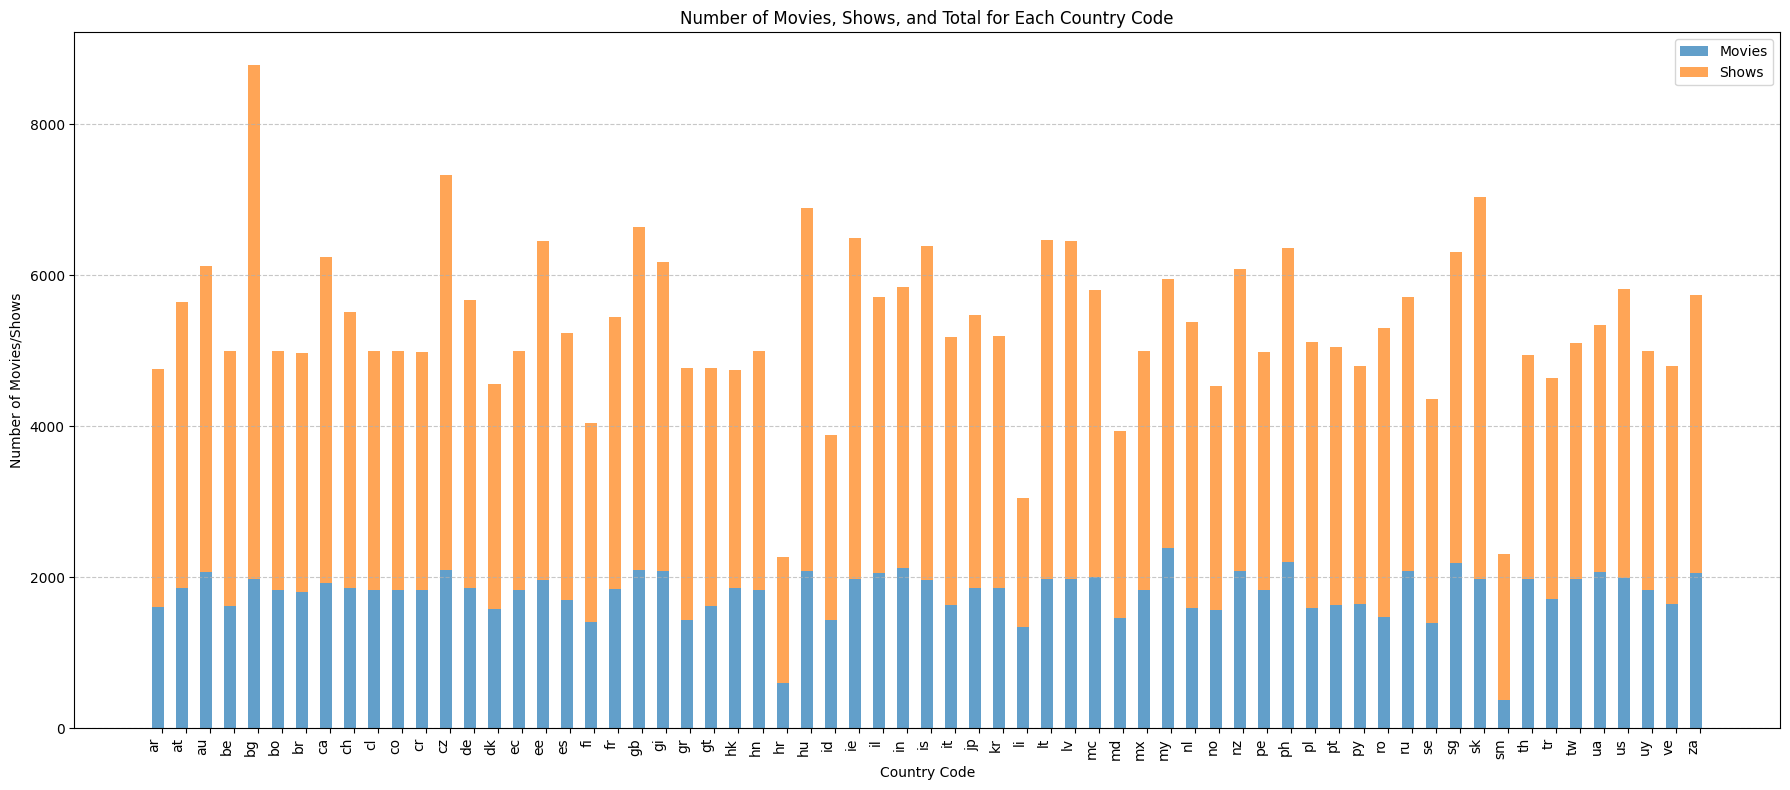

In [ ]:
import matplotlib.pyplot as plt


# Assuming your DataFrame is named 'df' and has columns:
# 'Country_code', 'No. of TV Shows', 'No. of Movies'

# Group data by country code and sum the number of movies and shows
grouped_data = df.groupby('Country_code')[['No. of TV Shows', 'No. of Movies']].sum()

# Calculate the total number of movies and shows
grouped_data['Total'] = grouped_data['No. of TV Shows'] + grouped_data['No. of Movies']

# Create the bar plot
fig, ax = plt.subplots(figsize=(18, 8))  # Adjust figure size if needed

width = 0.5  # Width of each bar

# Calculate positions for bars with spacing
x = np.arange(len(grouped_data.index))  # Create an array of positions
offset = 0.15  # Adjust this value to control the spacing

# Plot bars for movies, shows, and total with spacing
ax.bar(x - offset, grouped_data['No. of Movies'], width, label='Movies', color='#1f77b4', alpha=0.7)
ax.bar(x - offset, grouped_data['No. of TV Shows'], width, bottom=grouped_data['No. of Movies'], label='Shows', color='#ff7f0e', alpha=0.7)
# ax.bar(x, grouped_data['Total'], width, bottom=grouped_data['No. of Movies'] + grouped_data, label='Total')

# Update x-axis tick positions and labels
ax.set_xticks(x)
ax.set_xticklabels(grouped_data.index)

# Customize the plot
ax.set_xlabel('Country Code')
ax.set_ylabel('Number of Movies/Shows')
ax.set_title('Number of Movies, Shows, and Total for Each Country Code')
ax.legend()
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
countries_df = pd.read_csv('/content/Countries.csv')
countries_df

,Country_code,Country
0,ar,Argentina
1,au,Australia
2,at,Austria
3,be,Belgium
4,bo,Bolivia
...,...,...
60,ua,Ukraine
61,gb,United Kingdom
62,us,United States
63,uy,Uruguay


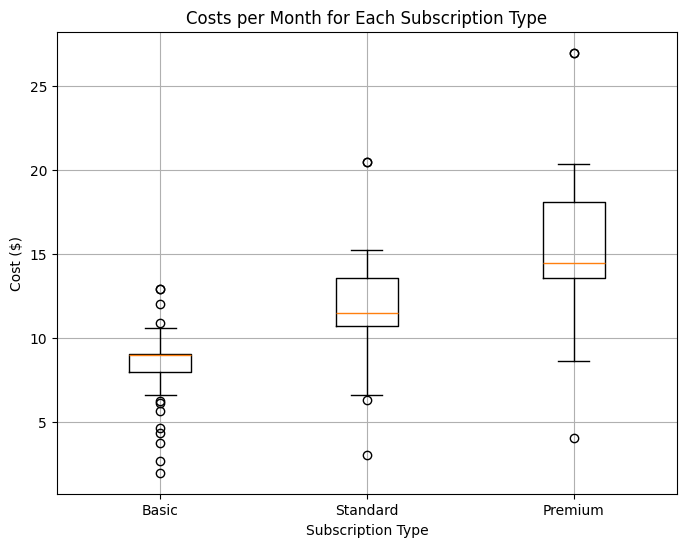

In [ ]:
# Assuming your DataFrame is named 'df' and has columns:
# 'Cost Per Month_0_Basic($)', 'Cost Per Month_1_Standard($)', 'Cost Per Month_2_Premium($)'

# Extract the cost data for each subscription type
basic_costs = df['Cost Per Month_0_Basic($)']
standard_costs = df['Cost Per Month_1_Standard($)']
premium_costs = df['Cost Per Month_2_Premium($)']

# Create a box plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.boxplot([basic_costs, standard_costs, premium_costs], labels=['Basic', 'Standard', 'Premium'])
plt.title('Costs per Month for Each Subscription Type')
plt.ylabel('Cost ($)')
plt.xlabel('Subscription Type')
plt.grid(True)
plt.show()

#5. Export Reviewers Dataset

In [ ]:
df

,Country_code,Subscription_ID_0_basic,Cost Per Month_0_Basic($),Subscription_ID_1_standard,Cost Per Month_1_Standard($),Subscription ID_2_premium,Cost Per Month_2_Premium($),Total Library Size,No. of TV Shows,No. of Movies
0,ar,0,3.74,1,6.30,2,9.26,4760,3154,1606
1,au,0,7.84,1,12.12,2,16.39,6114,4050,2064
2,at,0,9.03,1,14.67,2,20.32,5640,3779,1861
3,be,0,10.16,1,15.24,2,20.32,4990,3374,1616
4,bo,0,7.99,1,10.99,2,13.99,4991,3155,1836
...,...,...,...,...,...,...,...,...,...,...
60,ua,0,5.64,1,8.46,2,11.29,5336,3261,2075
61,gb,0,7.91,1,13.20,2,18.48,6643,4551,2092
62,us,0,8.99,1,13.99,2,17.99,5818,3826,1992
63,uy,0,8.99,1,12.99,2,15.99,4989,3154,1835


In [ ]:
df['Total Cost Per Month($)'] = df['Cost Per Month_0_Basic($)'] + df['Cost Per Month_1_Standard($)'] + df['Cost Per Month_2_Premium($)']

In [ ]:
df

,Country_code,Subscription_ID_0_basic,Cost Per Month_0_Basic($),Subscription_ID_1_standard,Cost Per Month_1_Standard($),Subscription ID_2_premium,Cost Per Month_2_Premium($),Total Library Size,No. of TV Shows,No. of Movies,Total Cost Per Month($)
0,ar,0,3.74,1,6.30,2,9.26,4760,3154,1606,19.30
1,au,0,7.84,1,12.12,2,16.39,6114,4050,2064,36.35
2,at,0,9.03,1,14.67,2,20.32,5640,3779,1861,44.02
3,be,0,10.16,1,15.24,2,20.32,4990,3374,1616,45.72
4,bo,0,7.99,1,10.99,2,13.99,4991,3155,1836,32.97
...,...,...,...,...,...,...,...,...,...,...,...
60,ua,0,5.64,1,8.46,2,11.29,5336,3261,2075,25.39
61,gb,0,7.91,1,13.20,2,18.48,6643,4551,2092,39.59
62,us,0,8.99,1,13.99,2,17.99,5818,3826,1992,40.97
63,uy,0,8.99,1,12.99,2,15.99,4989,3154,1835,37.97


In [ ]:
df.to_csv('cleaned_Netflix_SubscriptionFees.csv', index=False)